In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'APHA'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-14 21:00:00,2020-09-14 21:00:00,4.62,4.6400,4.6200,4.6500,1845
2020-09-15 21:00:00,2020-09-15 21:00:00,4.64,4.6400,4.6400,4.6400,438
2020-09-16 21:00:00,2020-09-16 21:00:00,4.65,4.6502,4.6500,4.6502,1652
2020-09-17 21:00:00,2020-09-17 21:00:00,4.62,4.6594,4.6301,4.6600,2376
2020-09-18 21:00:00,2020-09-18 21:00:00,4.65,4.6600,4.6700,4.6700,4070
...,...,...,...,...,...,...
2021-03-05 22:00:00,2021-03-05 22:00:00,15.80,15.9300,15.8100,15.9700,40802
2021-03-08 22:00:00,2021-03-08 22:00:00,16.21,16.3400,16.2100,16.3400,12028
2021-03-09 22:00:00,2021-03-09 22:00:00,18.11,18.1100,18.2900,18.4200,39383


In [3]:
# refresh data for today
fh.get_daily_closings(ticker, datetime.today(), include_ah = datetime.now() > datetime.now().replace(hour=22, minute = 0, second = 0, microsecond =0))

,t,o,l,h,c,v
0,2021-03-11 21:00:00,19.605,19.86,20.02,20.02,67070


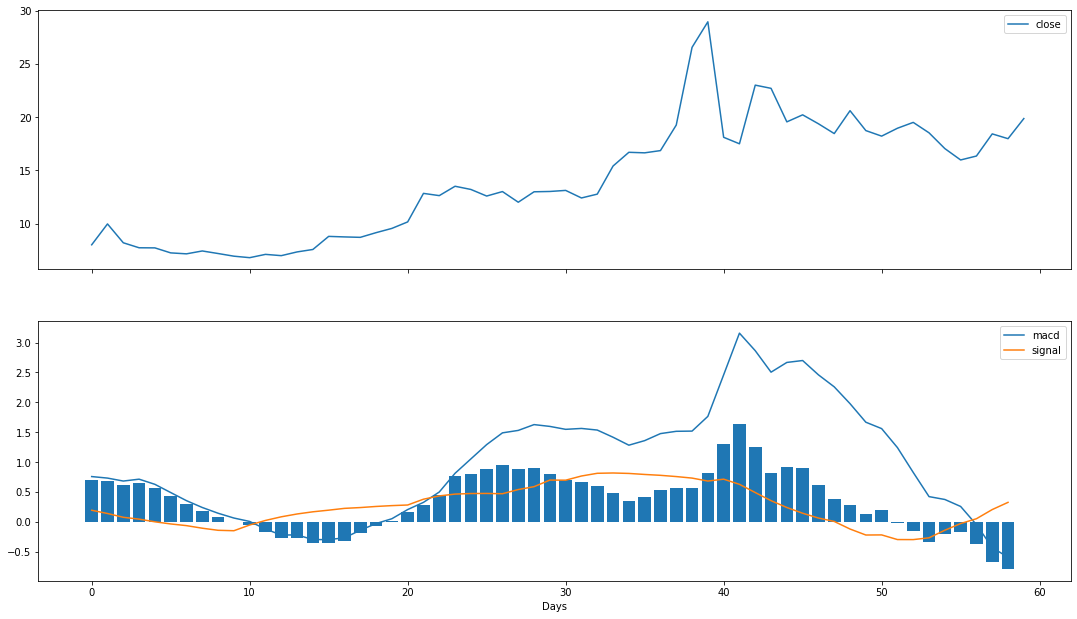

In [4]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

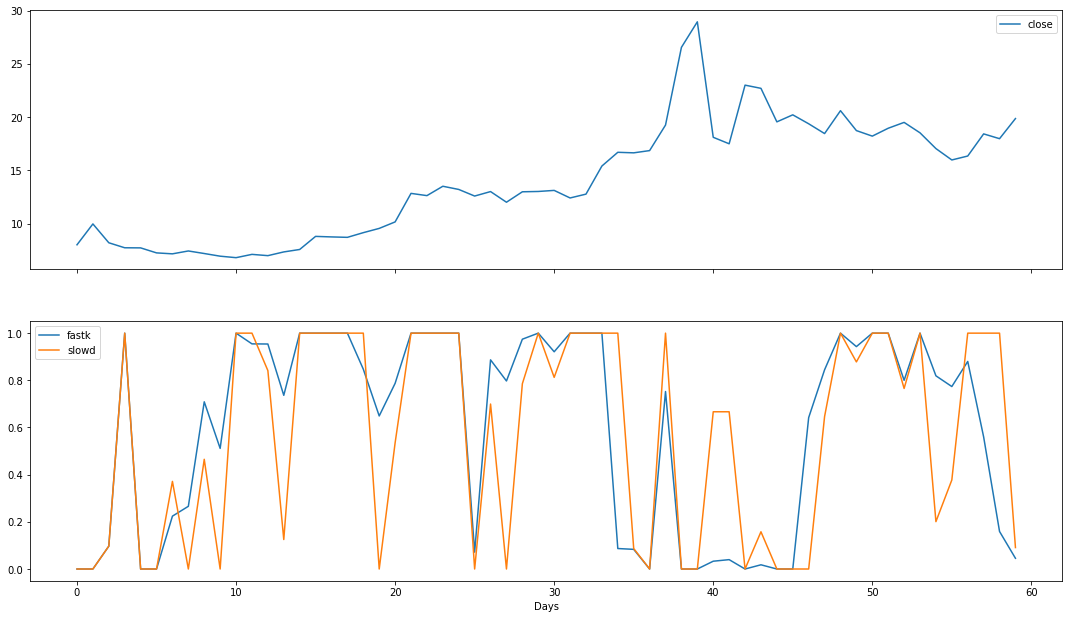

In [5]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)